In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
def reduce_mem_usage(df):
    """Reduce numeric

    Args:
        df (pandas data frame object): 

    Returns:
        obj: reduced pandas data frame
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/KonstantinKlepikov/covid-kaliningrad/main/data/data.csv')
data['дата'] = pd.to_datetime(data['дата'])
data = reduce_mem_usage(data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 72 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   дата                                             302 non-null    datetime64[ns]
 1   всего                                            302 non-null    float64       
 2   ОРВИ                                             302 non-null    float64       
 3   пневмония                                        302 non-null    float64       
 4   без симптомов                                    302 non-null    float64       
 5   кол-во тестов                                    302 non-null    float64       
 6   пенсионеры                                       302 non-null    float64       
 7   мед.работники                                    302 non-null    float64       
 8   пром.предприятия                        

In [5]:
data[['дата', 'всего', 'ОРВИ', 'пневмония', 'без симптомов']]

,дата,всего,ОРВИ,пневмония,без симптомов
0,2020-08-03,1.0,-1.0,-1.0,-1.0
1,2020-09-03,-1.0,-1.0,-1.0,-1.0
2,2020-10-03,-1.0,-1.0,-1.0,-1.0
3,2020-11-03,-1.0,-1.0,-1.0,-1.0
4,2020-12-03,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...
297,2020-12-30,221.0,171.0,38.0,12.0
298,2020-12-31,225.0,207.0,16.0,2.0
299,2021-01-01,221.0,179.0,35.0,7.0
300,2021-02-01,208.0,162.0,37.0,9.0


In [6]:
data.drop(['учебные учреждения'], axis=1)

,дата,всего,ОРВИ,пневмония,без симптомов,кол-во тестов,пенсионеры,мед.работники,пром.предприятия,образов.уч.,...,Светлогорский городской округ,Пионерский городской округ,Неманский городской округ,Полесский городской округ,Краснознаменский городской округ,Озёрский городской округ,Янтарный городской округ,Мамоновский городской округ,Советский городской окру,другие регионы
0,2020-08-03,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2020-09-03,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2020-10-03,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2020-11-03,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2020-12-03,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2020-12-30,221.0,171.0,38.0,12.0,2100.0,37.0,40.0,6.0,11.0,...,6.0,5.0,3.0,8.0,1.0,6.0,3.0,5.0,18.0,-1.0
298,2020-12-31,225.0,207.0,16.0,2.0,2408.0,96.0,13.0,7.0,13.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,2.0,1.0,-1.0
299,2021-01-01,221.0,179.0,35.0,7.0,3080.0,27.0,35.0,5.0,16.0,...,5.0,3.0,7.0,1.0,1.0,2.0,1.0,2.0,17.0,-1.0
300,2021-02-01,208.0,162.0,37.0,9.0,3248.0,54.0,31.0,8.0,4.0,...,3.0,3.0,1.0,2.0,4.0,1.0,-1.0,1.0,13.0,-1.0


In [8]:
profile = ProfileReport(data.drop(['учебные учреждения'], axis=1))

In [9]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/85 [00:00<?, ?it/s]

/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=

KeyboardInterrupt: 

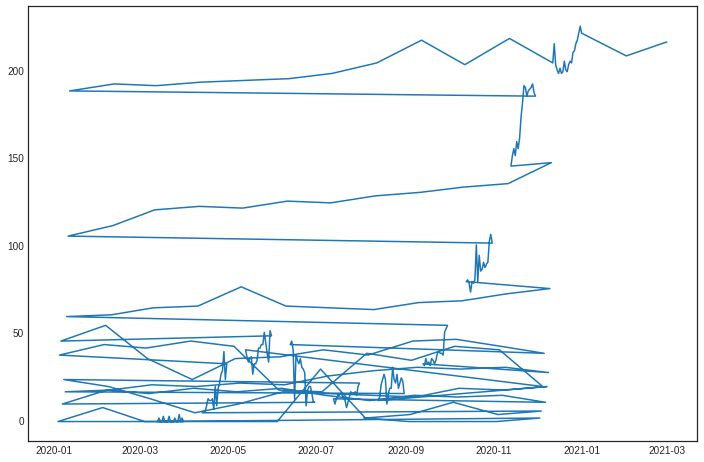

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data['дата'], data['всего'], label='всего')
# ax.plot(data['дата'], data['ОРВИ'], '-g', label='симптомы орви')
# ax.plot(data['дата'], data['пневмония'], '-r', label='симптомы пневмонии')
# ax.plot(data['дата'], data['без симптомов'], '-c', label='без симптомов')
# ax.set(xlabel='прирост', ylabel='дни')


<AxesSubplot:>

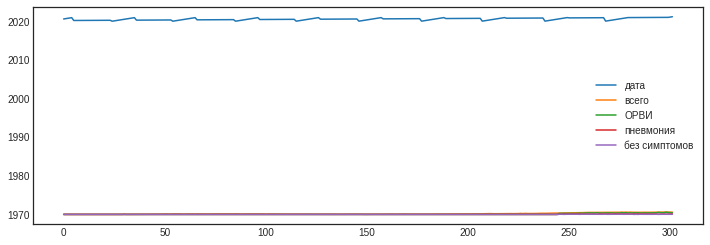

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
data[['дата', 'всего', 'ОРВИ', 'пневмония', 'без симптомов']].plot(ax=ax)
# ax.set(xlabel='прирост', ylabel='дни')

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data['дата'])

0     2020-08-03
1     2020-09-03
2     2020-10-03
3     2020-11-03
4     2020-12-03
5     2020-03-13
6     2020-03-14
7     2020-03-15
8     2020-03-16
9     2020-03-17
10    2020-03-18
11    2020-03-19
12    2020-03-20
13    2020-03-21
14    2020-03-22
15    2020-03-23
16    2020-03-24
17    2020-03-25
18    2020-03-26
19    2020-03-27
20    2020-03-28
21    2020-03-29
22    2020-03-30
23    2020-03-31
24    2020-01-04
25    2020-02-04
26    2020-03-04
27    2020-04-04
28    2020-05-04
29    2020-06-04
30    2020-07-04
31    2020-08-04
32    2020-09-04
33    2020-10-04
34    2020-11-04
35    2020-12-04
36    2020-04-13
37    2020-04-14
38    2020-04-15
39    2020-04-16
40    2020-04-17
41    2020-04-18
42    2020-04-19
43    2020-04-20
44    2020-04-21
45    2020-04-22
46    2020-04-23
47    2020-04-24
48    2020-04-25
49    2020-04-26
50    2020-04-27
51    2020-04-28
52    2020-04-29
53    2020-04-30
54    2020-01-05
55    2020-02-05
56    2020-03-05
57    2020-04-05
58    2020-05-

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    this = pd.read_csv('https://raw.githubusercontent.com/KonstantinKlepikov/covid-kaliningrad/main/data/data.csv', index_col='дата')
    print(this.index)

Index(['08.03.2020', '09.03.2020', '10.03.2020', '11.03.2020', '12.03.2020',
       '13.03.2020', '14.03.2020', '15.03.2020', '16.03.2020', '17.03.2020',
       ...
       '25.12.2020', '26.12.2020', '27.12.2020', '28.12.2020', '29.12.2020',
       '30.12.2020', '31.12.2020', '01.01.2021', '02.01.2021', '03.01.2021'],
      dtype='object', name='дата', length=302)


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    this = pd.read_csv('https://raw.githubusercontent.com/KonstantinKlepikov/covid-kaliningrad/main/data/data.csv', index_col='дата')
    print(this.index)